# Click to go to respective testing heading

<a href = "# Testing with 0 to 7" >  fast 0 to 7 Test </a>


<a href = "#Total-Number-of-Images-in-each-folder" >Total number of images in each folder</a>

<a href = "#All-Accuracies" >All accuracies</a>

<a href = "#Ground-Truth-&-Classification-Result" >Ground truth and classification result</a>

In [2]:
import time
st = time.process_time() # for overall time calculation

import tensorflow as tf
import numpy as np
import os

In [3]:
model = tf.keras.models.load_model("MP.h5") # loading our pre-trained model

# Change path to dataset here ↓
img_dirs = [f"C:/Users/EMIL/Desktop/college only data/College_Answer_Sheet_Dataset/college resized/{i}" for i in range(8)]
img_dir_0, img_dir_1, img_dir_2, img_dir_3, img_dir_4, img_dir_5, img_dir_6, img_dir_7 = img_dirs

# Declaring images in each folder and their ground truth as a list  
image_list_0, image_list_1, image_list_2, image_list_3, image_list_4, image_list_5, image_list_6, image_list_7 = [os.listdir(dir) for dir in img_dirs]

gnd_trt_0, gnd_trt_1, gnd_trt_2, gnd_trt_3, gnd_trt_4, gnd_trt_5, gnd_trt_6, gnd_trt_7 = [i for i in range(8)]

In [4]:
def prediction(image_folder, image_list):
    pred = []

    # Loop through all the images in the folder and classify them
    for image_name in image_list:
    
        test_image = tf.keras.preprocessing.image.load_img(os.path.join(image_folder, image_name), target_size=(40, 40), color_mode='grayscale')
        test_image = np.expand_dims(test_image, axis=0) # Expand the dimensions of the image to match the input shape of the model
    
        result = model.predict(test_image)
    
        predicted_value = np.argmax(result[0])
    
        pred.append(predicted_value)
        
    return pred

In [5]:
def accuracy(gnd_trt, image_list, preds): # Accuracy calculation
    true_labels = [gnd_trt] * len(image_list)
    correct_predictions = sum(preds[i] == true_labels[i] for i in range(len(image_list)))
    accuracy_percent = (correct_predictions / len(true_labels)) * 100
    return accuracy_percent

# Testing with 0 to 7

In [7]:
preds_0 = prediction(img_dir_0, image_list_0)
preds_1 = prediction(img_dir_1, image_list_1)
preds_2 = prediction(img_dir_2, image_list_2)
preds_3 = prediction(img_dir_3, image_list_3)
preds_4 = prediction(img_dir_4, image_list_4)
preds_5 = prediction(img_dir_5, image_list_5)
preds_6 = prediction(img_dir_6, image_list_6)
preds_7 = prediction(img_dir_7, image_list_7)

1/1 [==============================] - 0s 21ms/step


## Total Number of Images in each folder

In [8]:
for i in range(8): # Hard coded, as we know the no of classes
    print(f"Total images in {i} : {len(locals()[f'image_list_{i}'])}")
    # locals() method returns a dictionary with all the local variables for the current program.

Total images in 0 : 519
Total images in 1 : 642
Total images in 2 : 911
Total images in 3 : 1390
Total images in 4 : 248
Total images in 5 : 393
Total images in 6 : 270
Total images in 7 : 747


## All Accuracies

Accuracy of 0 : 82.27%
Accuracy of 1 : 97.66%
Accuracy of 2 : 46.21%
Accuracy of 3 : 46.76%
Accuracy of 4 : 50.81%
Accuracy of 5 : 66.16%
Accuracy of 6 : 77.41%
Accuracy of 7 : 42.17%


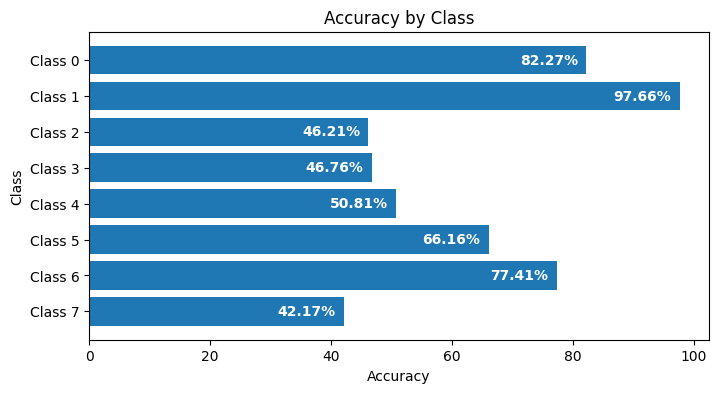

In [26]:
acc=[]

for i in range(8):
    print(f"Accuracy of {i} : {accuracy(locals()[f'gnd_trt_{i}'], locals()[f'image_list_{i}'], locals()[f'preds_{i}']):.2f}%")
    acc.append(accuracy(locals()[f'gnd_trt_{i}'], locals()[f'image_list_{i}'], locals()[f'preds_{i}']))


import matplotlib.pyplot as plt    

labels = [f'Class {i}' for i in range(8)]
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(labels, acc, align='center')

# Add axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Class')
ax.set_title('Accuracy by Class')

# Invert y-axis so that classes are listed from top to bottom
ax.invert_yaxis()

for i, acc in enumerate(acc):
    ax.text(acc -11, i, f'{acc:.2f}%', va='center',weight='bold',color='white')
# Show plot
plt.show()    

## Ground Truth & Classification Result

In [28]:
for i in range(8):
    print(f"Ground Truth: {locals()[f'gnd_trt_{i}']}\n\nClassified Values:\n{locals()[f'preds_{i}']}\n\n--------------------------------------------------------------------------------------------------------\n")

Ground Truth: 0

Classified Values:
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 6, 0, 0, 0, 0, 6, 0, 6, 1, 0, 0, 0, 0, 0, 2, 0, 6, 1, 0, 0, 0, 0, 0, 0, 

In [27]:
print(f"Total completion time: {((time.process_time() - st)/60):.2f} minutes")

Total completion time: 6.11 minutes


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os 

# Change path to dataset here ↓
img_dirs = [f"C:/Users/EMIL/Desktop/college only data/College_Answer_Sheet_Dataset/college resized/{i}" for i in range(8)]
img_dir_0, img_dir_1, img_dir_2, img_dir_3, img_dir_4, img_dir_5, img_dir_6, img_dir_7 = img_dirs

# Declaring images in each folder and their ground truth as a list  
image_list_0, image_list_1, image_list_2, image_list_3, image_list_4, image_list_5, image_list_6, image_list_7 = [os.listdir(dir) for dir in img_dirs]

preds_0, preds_1, preds_2, preds_3, preds_4, preds_5, preds_6, preds_7 

# Combine all ground truth and predicted values
y_true = np.append(gnd_trt_0, gnd_trt_1, gnd_trt_2, gnd_trt_3, gnd_trt_4, gnd_trt_5, gnd_trt_6, gnd_trt_7)
y_pred = np.append(preds_0, preds_1, preds_2, preds_3, preds_4, preds_5, preds_6, preds_7)


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


TypeError: _append_dispatcher() takes from 2 to 3 positional arguments but 8 were given

## End of test

In [21]:
gnd_trt_1

1